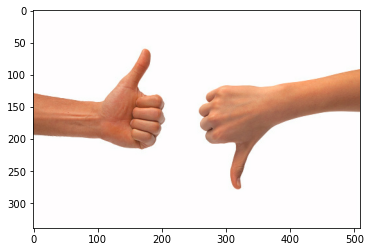

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image = cv2.imread("/home/yasin/Downloads/images/thumbs_up_down.jpg")
image_copy = np.ndarray.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy)


In [3]:
gray = cv2.cvtColor(image_copy,cv2.COLOR_BGR2GRAY)

retval, binary = cv2.threshold(gray,225,255,cv2.THRESH_BINARY_INV)


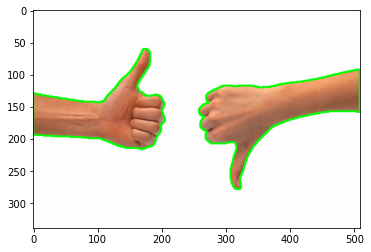

In [6]:
contours,hierarchy = cv2.findContours(binary, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

image_copy2 = np.ndarray.copy(image)

all_contours = cv2.drawContours(image_copy,contours,-1,(0,255,0),2)

plt.imshow(all_contours)

In [7]:
def orientations(contours):
    angles = []
    for cnt in contours:
        ellipse = cv2.fitEllipse(cnt)

        (x,y),(MA,ma),angle = cv2.fitEllipse(cnt)
        
        ellipse_img2 = np.ndarray.copy(all_contours)
    
        ellipse_img = cv2.ellipse (ellipse_img2,ellipse,(0,255,0),2)
    
        angles.append(angle)
    
    return angles
angles = orientations(contours)
print('Angles of each contour (in degrees): ' + str(angles))

Angles of each contour (in degrees): [61.28632736206055, 83.03323364257812]


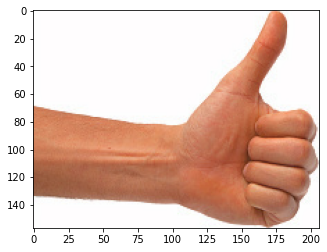

In [8]:
x,y,w,h = cv2.boundingRect(contours[1])
box_image = cv2.rectangle(all_contours, (x,y), (x+w,y+h), (200,0,200),2)
cropped_image = image[y: y + h, x: x + w] 
cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
plt.imshow(cropped_image)

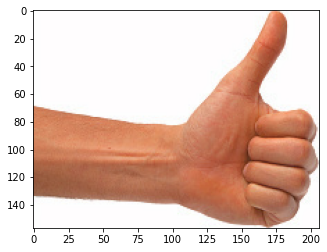

In [9]:
def left_hand_crop(image,all_contours):
        cropped_image = np.ndarray.copy(image)
        x,y,w,h = cv2.boundingRect(all_contours)
        cropped_image = cropped_image[y: y + h, x: x + w]
        cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
        return cropped_image
all_contours = contours[1]
if(all_contours is not None):
    cropped_image = left_hand_crop(image, all_contours)

    plt.imshow(cropped_image)